In [15]:
# importing literature
import numpy as np

from pandas.tseries import *
from pandas_datareader.data import DataReader
from pandas_datareader import data
import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [16]:
# US recession periods
usrec = DataReader('USREC', 'fred', '2000-01-01', '2018-01-31')
# NBER constraction periods
datacons = pd.read_excel('constration.xlsx')
datacons.set_index(datacons['Date'], inplace=True)
datacons.set_index('Date', inplace=True)
dateparse = lambda datacons: pd.to_datetime(datacons, format='%m%d%Y')

In [17]:
# returns of assets from May 2000 to January 2018 #total data for 2 periods# 
data = pd.read_excel('forFEB.xlsx')
data.set_index(data['Date'], inplace=True)
data.set_index('Date', inplace=True)

In [18]:
summery_statistic= data.describe()
summery_statistic

,Gold return,Oil return,US bond yield,S&P,JP bond yield,Nikkei,jpy/usd return,GR 10-Y Bond Yield,DAX,eur/usd,Shanghai Composite,China 3-Year Bond Yield
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.008342,0.007777,-0.001086,0.004265,0.012372,0.000930,0.000345,-0.013343,0.004380,0.001615,0.006312,0.076981
std,0.049660,0.091696,0.085728,0.042155,0.379327,0.058404,0.027967,0.288230,0.059951,0.029664,0.077271,0.242169
min,-0.180050,-0.326212,-0.264484,-0.172583,-2.388889,-0.113867,-0.071301,-2.358333,-0.254222,-0.097206,-0.246314,-0.365438
25%,-0.023637,-0.052065,-0.050277,-0.018504,-0.121780,-0.038918,-0.018221,-0.050963,-0.027341,-0.014218,-0.042898,-0.030362
50%,0.007403,0.016298,-0.003338,0.009964,-0.041958,-0.004061,0.000611,-0.015001,0.009617,0.002314,0.007104,0.009461
75%,0.038010,0.070933,0.039687,0.029291,0.074689,0.028040,0.015956,0.039922,0.040113,0.020294,0.048530,0.059538
max,0.138672,0.297144,0.309589,0.109458,3.400000,0.312800,0.092063,1.100962,0.213778,0.100961,0.274464,0.791904


In [19]:
ss = pd.ExcelWriter('summery_statistic.xlsx', engine='xlsxwriter')
summery_statistic.to_excel(ss, 'Sheet1')
ss.save()

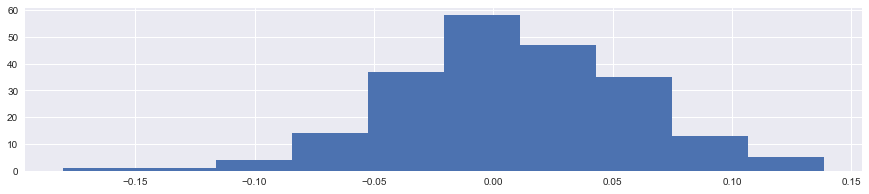

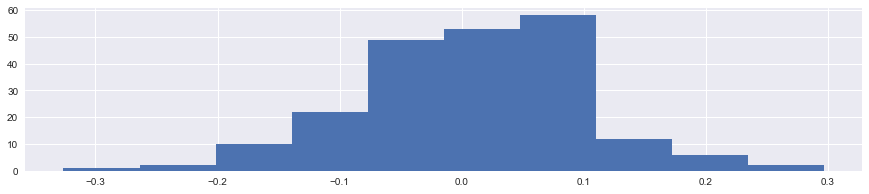

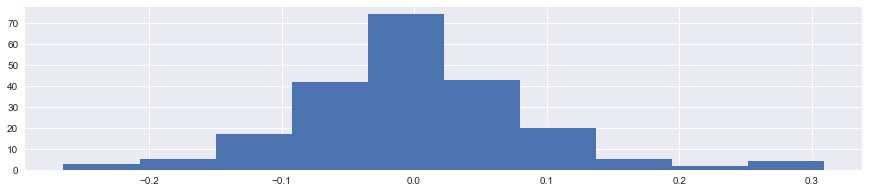

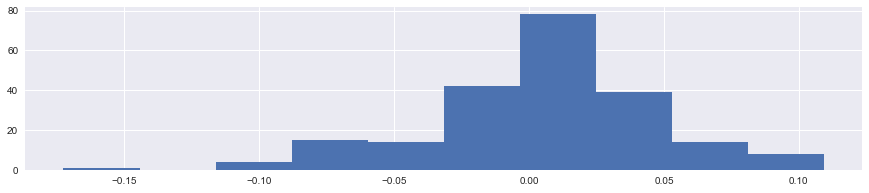

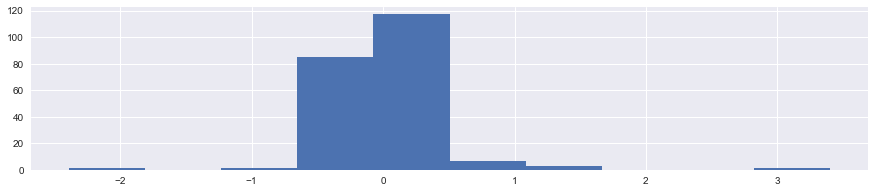

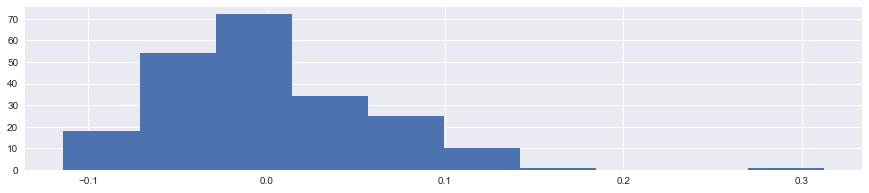

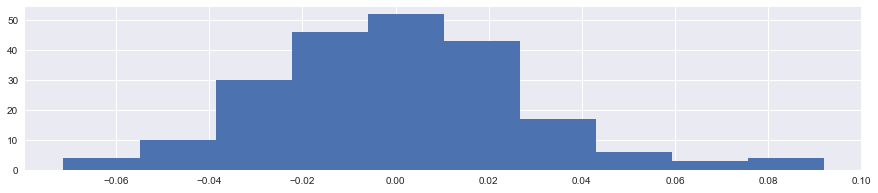

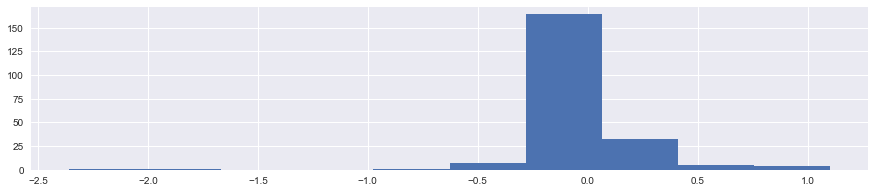

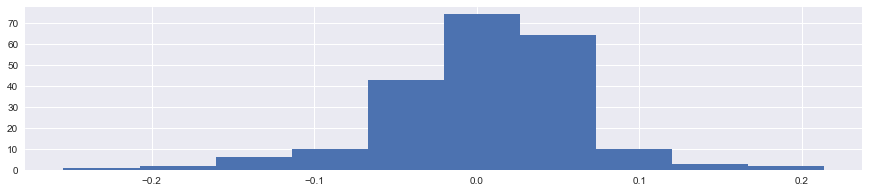

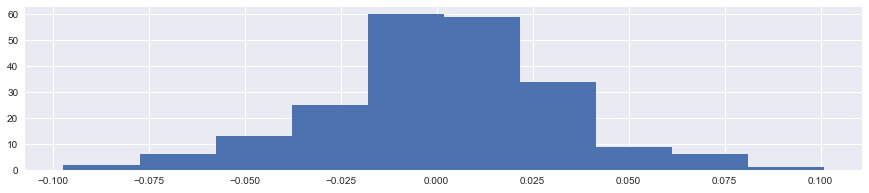

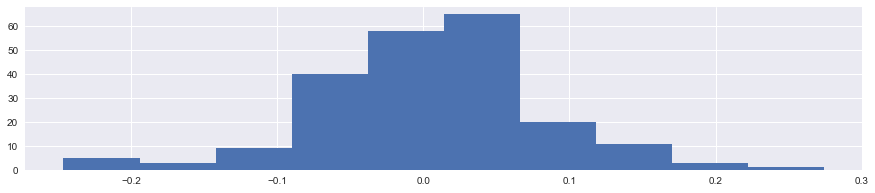

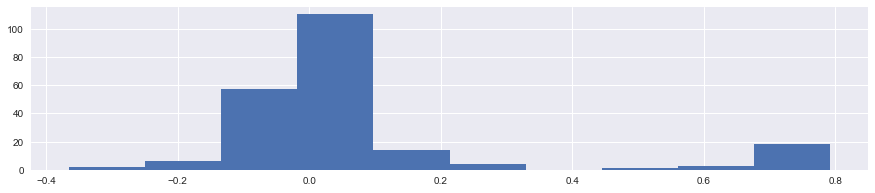

In [42]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size
for column in data:
    plt.hist(data[column])
    plt.show()

In [18]:
# Regime switching model unconditional for S&P 500
mod_SP= sm.tsa.MarkovAutoregression(data['S&P'], k_regimes=2, order=1, trend='c', switching_ar=True, switching_variance=True)
res_SP= mod_SP.fit(cov_type="opg", maxiter=200, full_output=True,disp=True,em_iter=2)
print (res_SP.summary())
print res_SP.params

Optimization terminated successfully.
         Current function value: -1.899094
         Iterations: 37
         Function evaluations: 50
         Gradient evaluations: 50
                         Markov Switching Model Results                         
Dep. Variable:                      S&P   No. Observations:                  214
Model:             MarkovAutoregression   Log Likelihood                 406.406
Date:                  Mon, 14 May 2018   AIC                           -796.812
Time:                          21:55:36   BIC                           -769.884
Sample:                      04-01-2000   HQIC                          -785.931
                           - 01-01-2018                                         
Covariance Type:                    opg                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

In [19]:
predict = mod_SP.predict(res_SP.params, start=None, end=None, probabilities=None, conditional=False)

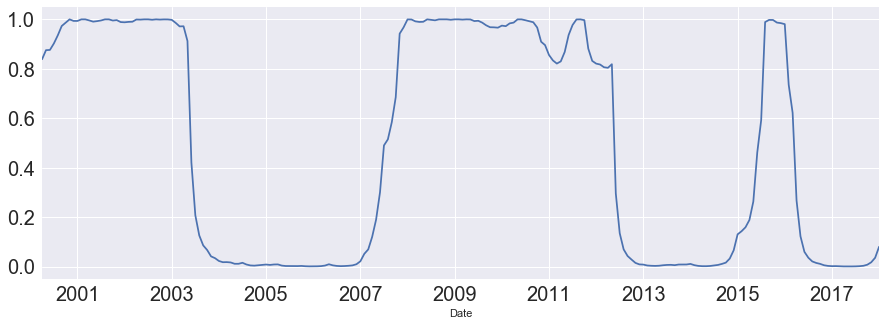

In [20]:
#probabilities of being in high volatility regime for S&P 500
res_SP.smoothed_marginal_probabilities[1].plot(figsize=(15,5), fontsize=20)
plt.savefig('prob.png', dpi=199)

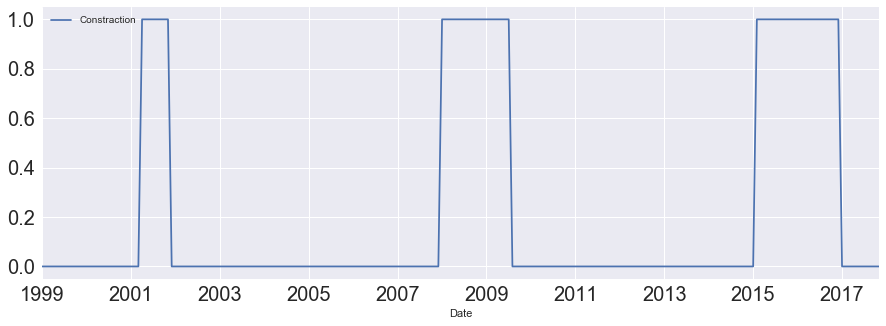

In [21]:
# NBER onstraction periods
datacons.plot(figsize=(15,5), fontsize=20)

In [127]:
print res_SP.smoothed_marginal_probabilities[1].tail(4)

Date
2017-10-01    0.008284
2017-11-01    0.018105
2017-12-01    0.036469
2018-01-01    0.080759
Name: 1, dtype: float64


In [ ]:
# Model II with switching AR and variance terms -conditional on FED =model 2=

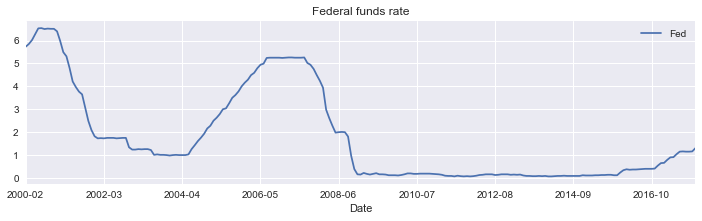

In [22]:
# Get the conditional information
fed = pd.read_excel('fed.xlsx')
fed.set_index(fed['Date'], inplace=True)
fed.set_index('Date', inplace=True)

fed.plot(title='Federal funds rate', figsize=(12,3))

In [23]:
# Regime switching model conditional on Federal Funds short term interest rates  for S&P 500
mod_fed = sm.tsa.MarkovAutoregression(
    data['S&P'], k_regimes=2, order=1, switching_ar= True, switching_variance=True,
    exog_tvtp=sm.add_constant(fed["Fed"]))
res_fed=mod_fed.fit()
print(res_fed.summary())

                         Markov Switching Model Results                         
Dep. Variable:                      S&P   No. Observations:                  214
Model:             MarkovAutoregression   Log Likelihood                 407.972
Date:                  Mon, 14 May 2018   AIC                           -795.944
Time:                          21:56:13   BIC                           -762.285
Sample:                      04-01-2000   HQIC                          -782.343
                           - 01-01-2018                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0119      0.002      6.277      0.000       0.008       0.016
sigma2         0.0005   8.29e-05    

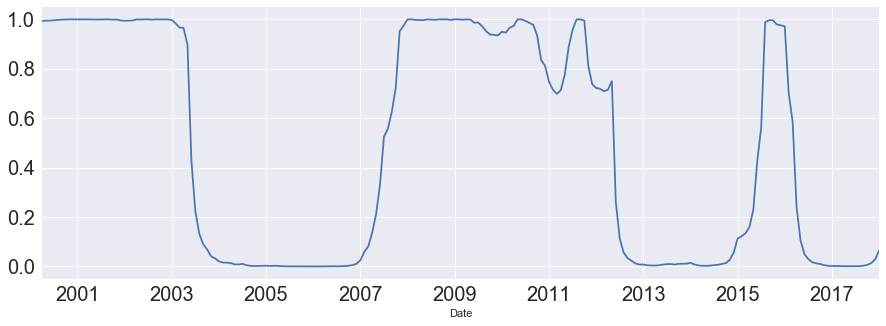

In [24]:
# conditional probabilities
res_fed.smoothed_marginal_probabilities[1].plot(figsize=(15,5), fontsize=20)
plt.savefig('prob2.png', dpi=199)

In [126]:
print res_fed.smoothed_marginal_probabilities[1].tail(4)

Date
2017-10-01    0.006319
2017-11-01    0.013916
2017-12-01    0.028522
2018-01-01    0.064530
Name: 1, dtype: float64


               vix
date              
2000-02  23.370001
2000-03  24.110001


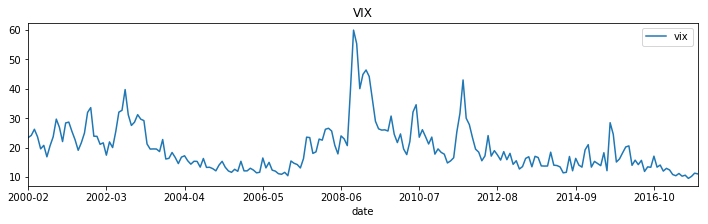

In [8]:
#volatility index
vix = pd.read_excel('vix.xlsx')
vix.set_index(vix['date'], inplace=True)
vix.set_index('date', inplace=True)

vix.plot(title='VIX', figsize=(12,3))
print vix.head(2)

In [25]:
#regime -switching model for S&P500 conditional on VIX #not reported #
mod_VIX = sm.tsa.MarkovAutoregression(data["S&P"], k_regimes=2, order=1, trend='c', exog=vix["vix"], switching_ar= True,switching_exog=True, switching_variance=True)
res_VIX=mod_VIX.fit(cov_type="opg", maxiter=200, full_output=True,disp=True,em_iter=1)
print(res_VIX.summary())

Optimization terminated successfully.
         Current function value: -1.956984
         Iterations: 38
         Function evaluations: 49
         Gradient evaluations: 49
                         Markov Switching Model Results                         
Dep. Variable:                      S&P   No. Observations:                  214
Model:             MarkovAutoregression   Log Likelihood                 418.795
Date:                  Sun, 11 Feb 2018   AIC                           -817.589
Time:                          19:08:05   BIC                           -783.929
Sample:                      04-01-2000   HQIC                          -803.988
                           - 01-01-2018                                         
Covariance Type:                    opg                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

In [46]:
mod_VIX_oil = sm.tsa.MarkovAutoregression(data["Oil return"], k_regimes=2, order=1, trend='c', exog=vix["vix"], switching_ar= True,switching_exog=True, switching_variance=True)
res_VIX_oil=mod_VIX_oil.fit(cov_type="opg", maxiter=200, full_output=True,disp=True,em_iter=1)
print(res_VIX_oil.summary())

Optimization terminated successfully.
         Current function value: -1.032786
         Iterations: 42
         Function evaluations: 50
         Gradient evaluations: 50
                         Markov Switching Model Results                         
Dep. Variable:               Oil return   No. Observations:                  214
Model:             MarkovAutoregression   Log Likelihood                 221.016
Date:                  Sun, 11 Feb 2018   AIC                           -422.032
Time:                          19:37:30   BIC                           -388.373
Sample:                      04-01-2000   HQIC                          -408.431
                           - 01-01-2018                                         
Covariance Type:                    opg                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

In [49]:
mod_VIX_oil2 = sm.tsa.MarkovAutoregression(data["Oil return"], k_regimes=2, order=1, trend='c', exog_tvtp=sm.add_constant(fed["Fed"]), switching_ar= True,switching_exog=True, switching_variance=True)
res_VIX_oil2=mod_VIX_oil2.fit(cov_type="opg", maxiter=200, full_output=True,disp=True,em_iter=1)
print(res_VIX_oil2.summary())


Optimization terminated successfully.
         Current function value: -1.020542
         Iterations: 65
         Function evaluations: 74
         Gradient evaluations: 74
                         Markov Switching Model Results                         
Dep. Variable:               Oil return   No. Observations:                  214
Model:             MarkovAutoregression   Log Likelihood                 218.396
Date:                  Sun, 11 Feb 2018   AIC                           -416.792
Time:                          19:41:15   BIC                           -383.132
Sample:                      04-01-2000   HQIC                          -403.190
                           - 01-01-2018                                         
Covariance Type:                    opg                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

In [58]:
mod_VIX_eur = sm.tsa.MarkovAutoregression(data["eur/usd"], k_regimes=2, order=1, trend='c',exog=(vix["vix"]), switching_ar= True,switching_exog=True, switching_variance=True)
res_VIX_eur=mod_VIX_eur.fit(cov_type="opg", maxiter=200, full_output=True,disp=True,em_iter=5)
print(res_VIX_eur.summary())

Optimization terminated successfully.
         Current function value: -2.148087
         Iterations: 47
         Function evaluations: 64
         Gradient evaluations: 64
                         Markov Switching Model Results                         
Dep. Variable:                  eur/usd   No. Observations:                  214
Model:             MarkovAutoregression   Log Likelihood                 459.691
Date:                  Sun, 11 Feb 2018   AIC                           -899.381
Time:                          19:52:09   BIC                           -865.722
Sample:                      04-01-2000   HQIC                          -885.780
                           - 01-01-2018                                         
Covariance Type:                    opg                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

In [62]:
mod_VIX_ub = sm.tsa.MarkovAutoregression(data["US bond yield"], k_regimes=2, order=1, trend='c', exog=(vix["vix"]), switching_ar= True,switching_exog=True, switching_variance=True)
res_VIX_ub=mod_VIX_ub.fit(cov_type="opg", maxiter=200, full_output=True,disp=True,em_iter=5)
print(res_VIX_ub.summary())

Optimization terminated successfully.
         Current function value: -1.149485
         Iterations: 41
         Function evaluations: 49
         Gradient evaluations: 49
                         Markov Switching Model Results                         
Dep. Variable:            US bond yield   No. Observations:                  214
Model:             MarkovAutoregression   Log Likelihood                 245.990
Date:                  Sun, 11 Feb 2018   AIC                           -471.980
Time:                          20:05:37   BIC                           -438.320
Sample:                      04-01-2000   HQIC                          -458.378
                           - 01-01-2018                                         
Covariance Type:                    opg                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------